In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
import warnings
warnings.filterwarnings('ignore')

*С Новым годом!*

### <center> Задание по регуляризации

Для выполнения данной работы необходимо использовать набор данных из прошлой лабораторной работы.

1. Обучить Ridge, Lasso и ElasticNet регрессии. Посмотреть, становится ли качество модели лучше после применения данных видов регрессии с регуляризацией. Сравнить качество модели
2. Построить кривые обучения регрессии с регуляризацией и обычной линейной регрессией, прокоментровать полученные графики.

In [2]:
data = pd.read_csv('regression_data.csv')
data.head()

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
0,8059,2013-05-21,11,11.0,2.0,3.0,5.0,2.0,1907,1.0,12.0,75377,Hamovniki,2750000,55485.2,14983.92,47.35,40.77,2.31,76.37
1,8138,2013-05-25,53,30.0,10.0,3.0,16.0,1.0,1980,2.0,8.0,68630,Lianozovo,9000000,55485.2,14983.92,47.35,40.77,2.31,76.37
2,8156,2013-05-27,77,41.0,2.0,1.0,17.0,6.0,2014,3.0,12.0,9553,Poselenie Voskresenskoe,7011550,55485.2,14983.92,47.35,40.77,2.31,76.37
3,8157,2013-05-27,45,27.0,6.0,3.0,9.0,1.0,1970,2.0,6.0,78616,Severnoe Butovo,7100000,55485.2,14983.92,47.35,40.77,2.31,76.37
4,8258,2013-05-30,74,46.0,12.0,3.0,24.0,1.0,2004,3.0,9.0,27992,Juzhnoe Medvedkovo,12100000,55485.2,14983.92,47.35,40.77,2.31,76.37


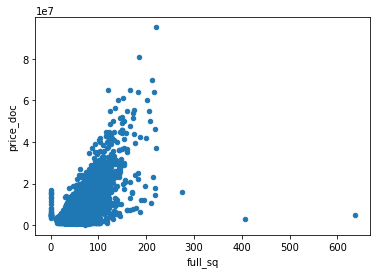

In [3]:
data.plot(x='full_sq', y='price_doc', kind='scatter')

Удалим выбросы - точки, у которых площадь больше 250 м2 и точки, у которых цена больше 75000000 рублей, а также точки, у которых площадь около нуля, а цена доходит до 2х миллионов (включил в выбросы помещения с площадью меньше 10 кв.м, поскольку минимальное жилое помещение по нормам СанПина - 8 кв.м + добавил 2 кв. м на кухню).

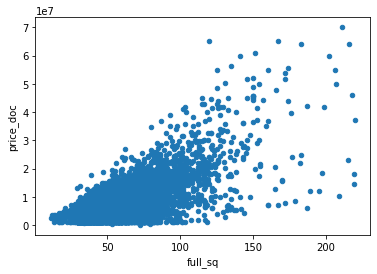

In [4]:
# Находим выбросы, их индексы и удаляем
ind = data[(data['full_sq']>250)|(data['price_doc']>75000000)|(data['full_sq']<10)].index
clean_data = data.drop(ind, axis='index')
clean_data.plot(x='full_sq', y='price_doc', kind='scatter')

# **Ridge Regression**

In [5]:
# Формируем X и y для построения модели
X = clean_data[['full_sq', 'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = clean_data['price_doc']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Создаем объект модели
lr = LinearRegression()
# Обучаем модель на данных, применяя метод fit()
lr.fit(X_train, y_train)

print("R-квадрат на обучающем наборе:", lr.score(X_train, y_train))
print("R-квадрат на тестовом наборе:", lr.score(X_test, y_test))

R-квадрат на обучающем наборе: 0.4657653717330844
R-квадрат на тестовом наборе: 0.5008732919690839


In [6]:
lr.coef_

array([ 1.71573060e+05, -3.10956421e+02,  4.86003835e+04,  1.14143770e+06,
       -1.80848161e+04,  1.28532547e+05, -1.53850416e+00, -3.66125994e+05,
       -1.48383077e+03,  1.61250674e-01, -2.84613305e+02,  4.59730277e+02,
       -1.59267581e+04,  7.63567002e+04, -4.25975922e+03,  5.06190568e+06])

In [7]:
ridge = Ridge().fit(X_train, y_train)

print("R-квадрат на обучающем наборе:", ridge.score(X_train, y_train))
print("R-квадрат на тестовом наборе:", ridge.score(X_test, y_test))

R-квадрат на обучающем наборе: 0.46574696374660873
R-квадрат на тестовом наборе: 0.5008445828994463


In [8]:
ridge.coef_

array([ 1.71572281e+05, -3.11519642e+02,  4.85875686e+04,  1.14068788e+06,
       -1.80611493e+04,  1.28519594e+05, -1.53808389e+00, -3.66627747e+05,
       -1.49024823e+03,  1.61406211e-01, -2.01553907e+02,  4.04314122e+02,
       -1.49817233e+04,  8.26239726e+04, -3.54632792e+03,  3.71630239e+06])

In [9]:
ridge = Ridge(alpha=1).fit(X_train, y_train)
print("R-квадрат на обучающем наборе:", ridge.score(X_train, y_train))
print("R-квадрат на тестовом наборе:", ridge.score(X_test, y_test))

R-квадрат на обучающем наборе: 0.46574696374660873
R-квадрат на тестовом наборе: 0.5008445828994463


In [10]:
lasr_cv = RidgeCV(alphas=[0.1, 0.3, 0.5, 1.0, 5.0, 10.0, 15.0, 20.0])
lasr_cv.fit(X_train, y_train)
print(f"alpha = {lasr_cv.alpha_}, score = {lasr_cv.score(X_train, y_train)}")
print("R-квадрат на тестовом наборе:", lasr_cv.score(X_test, y_test))

alpha = 10.0, score = 0.4655988138973828
R-квадрат на тестовом наборе: 0.5006579468742522


# **Lasso Regression**

In [11]:
lasso = Lasso(alpha=1).fit(X_train, y_train)
print("R-квадрат на обучающем наборе:", lasso.score(X_train, y_train))
print("R-квадрат на тестовом наборе:", lasso.score(X_test, y_test))
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))

R-квадрат на обучающем наборе: 0.4657653715541735
R-квадрат на тестовом наборе: 0.5008732515464054
Количество использованных признаков: 16


In [12]:
lasso.coef_

array([ 1.71572937e+05, -3.10958792e+02,  4.86002729e+04,  1.14143382e+06,
       -1.80845954e+04,  1.28532129e+05, -1.53850009e+00, -3.66124084e+05,
       -1.48384830e+03,  1.61251460e-01, -2.84354858e+02,  4.59554901e+02,
       -1.59210099e+04,  7.63693544e+04, -4.25456444e+03,  5.05772000e+06])

In [13]:
# Изменяем значение "max_iter" и "alpha" для проверки изменения метрик.
lasso_100000 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) # 
print("R-квадрат на обучающем наборе:", lasso_100000.score(X_train, y_train))
print("R-квадрат на тестовом наборе:", lasso_100000.score(X_test, y_test))
print("Количество использованных признаков: {}".format(np.sum(lasso_100000.coef_ != 0)))

R-квадрат на обучающем наборе: 0.4657653717330681
R-квадрат на тестовом наборе: 0.5008732915789786
Количество использованных признаков: 16


In [14]:
lasso_100000.coef_

array([ 1.71573059e+05, -3.10956445e+02,  4.86003824e+04,  1.14143766e+06,
       -1.80848139e+04,  1.28532542e+05, -1.53850412e+00, -3.66125974e+05,
       -1.48383094e+03,  1.61250682e-01, -2.84610836e+02,  4.59728600e+02,
       -1.59267015e+04,  7.63568178e+04, -4.25970839e+03,  5.06186566e+06])

In [15]:
lasr_cv = LassoCV(alphas=[0.1, 0.3, 0.5, 1.0, 5.0, 10.0, 15.0, 20.0])
lasr_cv.fit(X_train, y_train)
print(f"alpha = {lasr_cv.alpha_}, score = {lasr_cv.score(X_train, y_train)}")
print("R-квадрат на тестовом наборе:", lasr_cv.score(X_test, y_test))

alpha = 20.0, score = 0.4657653059942499
R-квадрат на тестовом наборе: 0.5008724456051972


# **ElasticNet**

In [16]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.3).fit(X_train, y_train)
print("R-квадрат на обучающем наборе:", elastic_net.score(X_train, y_train))
print("R-квадрат на тестовом наборе:", elastic_net.score(X_test, y_test))

R-квадрат на обучающем наборе: 0.4650492282363815
R-квадрат на тестовом наборе: 0.5002958371620925


In [17]:
el_cv_clf = ElasticNetCV(alphas=[0.1, 0.3, 0.5, 1.0, 5.0, 10.0, 20.0],
                         l1_ratio=[0, 0.1, 0.25, 0.4, 0.5, 0.7, 0.8, 0.9, 1])
el_cv_clf.fit(X_train, y_train)

print(f"alpha = {el_cv_clf.alpha_}, l1_ratio = {el_cv_clf.l1_ratio_}, score = {el_cv_clf.score(X_train, y_train)}")
print("R-квадрат на тестовом наборе:", el_cv_clf.score(X_test, y_test))

alpha = 20.0, l1_ratio = 1.0, score = 0.4657653059942499
R-квадрат на тестовом наборе: 0.5008724456051972


*Анализируя полученнные результаты, есть ощущение, что я допустил какую-то ошибку, поскольку различия в качестве модели минимальные (изменения только после 3 знаков после запятой).
Возможно конечно, что модель очень хорошо обучилась и попались удачные данные, но не уверен, что настолько всё ровно может получаться даже при таком раскладе.*

# **Кривые обучения**

In [ ]:
lin_r2_train = []
lin_r2_test = []

ridge_r2_train = []
ridge_r2_test = []

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

for n in range(1, len(X_train), 10):
#     Метрики по линейной регрессия
    lr = LinearRegression().fit(X_train[:n], y_train[:n])
    lr_train_pred = lr.predict(X_train[:n])
    lr_test_pred = lr.predict(X_test)

    lin_r2_train.append(lr.score(X_train[:n], y_train[:n]))
    lin_r2_test.append(lr.score(X_test, y_test))
    
#     Метрики по гребневой регрессии
    ridge = Ridge().fit(X_train[:n], y_train[:n])
    ridge_train_pred = ridge.predict(X_train[:n])
    ridge_test_pred = ridge.predict(X_test)
    
    ridge_r2_train.append(ridge.score(X_train[:n], y_train[:n]))
    ridge_r2_test.append(ridge.score(X_test, y_test))

По данному моменту не совсем понял, что мы делаем. Хотел бы уточнить на паре, если будем просматривать задание.

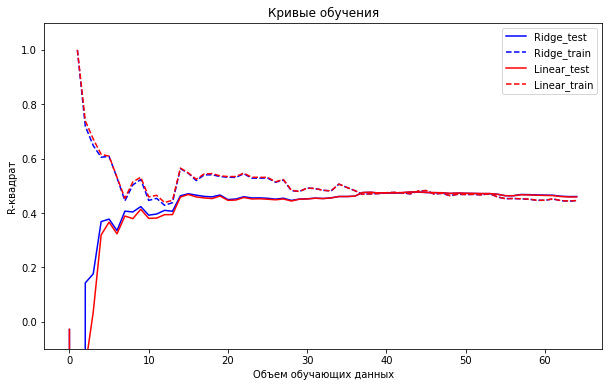

In [25]:
plt.figure(figsize=(10,6))
sns.lineplot(x=[i for i in range(len(ridge_r2_test))], y=ridge_r2_test, label='Ridge_test', color='b');
sns.lineplot(x=[i for i in range(len(ridge_r2_train))], y=ridge_r2_train, label='Ridge_train', linestyle='dashed', color='b');

sns.lineplot(x=[i for i in range(len(lin_r2_test))], y=lin_r2_test, label='Linear_test', color='red');
sns.lineplot(x=[i for i in range(len(lin_r2_train))], y=lin_r2_train, label='Linear_train', linestyle='dashed', color='red');
plt.ylim((-0.1, 1.1))
plt.xlabel('Объем обучающих данных')
plt.ylabel('R-квадрат')
plt.title('Кривые обучения');

*В данном случае качество работы гребневой и линейной регрессии одинаковы. Это может быть вызвано тем, что в обучении участвовало достаточное количество обучающих данных, что свело важность регуляризации к минимуму.
Но, может быть, что-то не так сделал, так как в предыдущей части и в этой результаты моделей практически не отличаются друг от друга. Но я так и не смог понять ошибку, если она есть...*